

<b><h2>Density estimation: Psychological experiments. (50 points)</h2><br>

*The data **setn90pol.csv** contains information on 90 university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views. The variables **amygdala** and **acc** indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar body-type variables. The variable **orientation** gives the students’ locations on a five-point scale from 1 (very conservative) to 5 (very liberal).*</b>

In [1]:
# imports
# %matplotlib inline
# %matplotlib notebook
# %matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity


In [2]:
data = pd.read_csv('n90pol.csv')
data['amygdala'] -= data['amygdala'].mean()
data['acc'] -= data['acc'].mean()

I provide a plot of amygdala and acc for all orientations for reference:

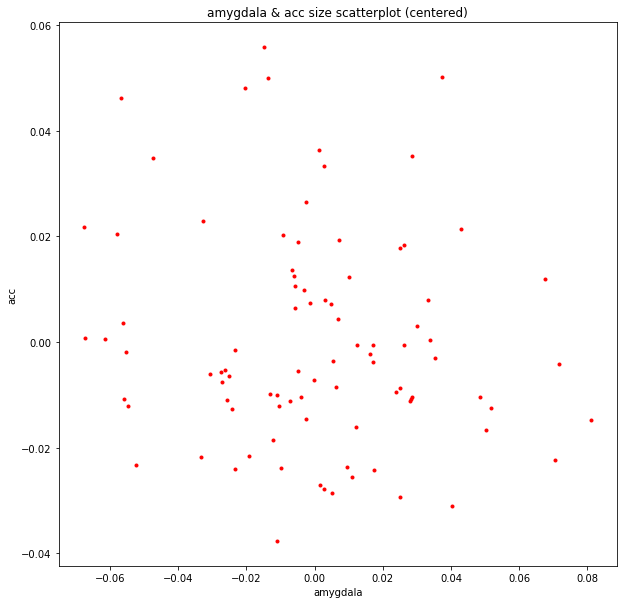

In [3]:
%matplotlib inline
plt.figure(figsize = (10,10))
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title('amygdala & acc size scatterplot (centered)')
plt.plot(data['amygdala'], data['acc'],'r.')
plt.show()

In [4]:
xo2 = data[data['orientation'] == 2]['amygdala'].values
yo2 = data[data['orientation'] == 2]['acc'].values
xo3 = data[data['orientation'] == 3]['amygdala'].values
yo3 = data[data['orientation'] == 3]['acc'].values
xo4 = data[data['orientation'] == 4]['amygdala'].values
yo4 = data[data['orientation'] == 4]['acc'].values
xo5 = data[data['orientation'] == 5]['amygdala'].values
yo5 = data[data['orientation'] == 5]['acc'].values

<b>(a) *Form 2-dimensional histogram for the pairs of variables (amygdala, acc). Decide on a suitable number of bins so you can see the shape of the distribution clearly.*</b>
<br>
Below, the 2-d histogram is visualized. I wasn't able to get a plot of them all in one chart so instead I show them in their own charts each by orientation. 

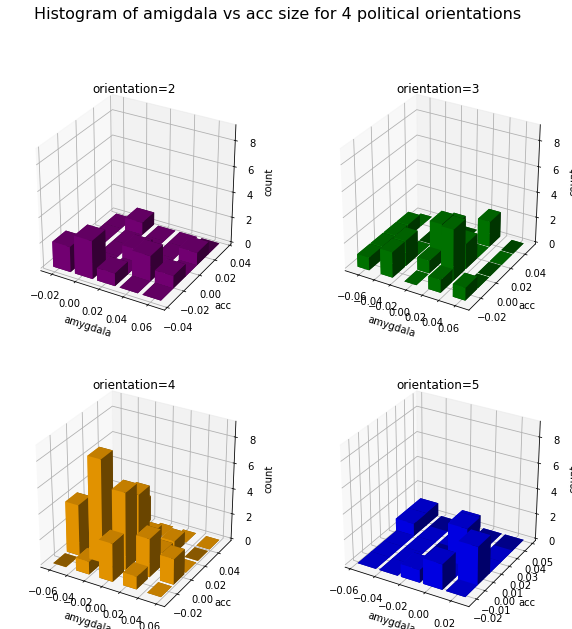

In [5]:
%matplotlib inline



nbins = 5
nrange = [[-0.1, 0.1],[-0.1, 0.1]]
nrange = None
maxz = 9
nwat = 0

# build the histograms
hist2, xedges2, yedges2 = np.histogram2d(xo2, yo2, bins=nbins, range=nrange)
xpos2, ypos2 = np.meshgrid(xedges2[:-1] + nwat, yedges2[:-1] +nwat, indexing = 'ij')
xpos2 = xpos2.ravel()
ypos2 = ypos2.ravel()
zpos2 = 0
dx2 = dy2 = 0.015 * np.ones_like(zpos2)

hist3, xedges3, yedges3 = np.histogram2d(xo3, yo3, bins=nbins, range=nrange)
xpos3, ypos3 = np.meshgrid(xedges3[:-1] + nwat, yedges3[:-1] +nwat, indexing = 'ij')
xpos3 = xpos3.ravel()
ypos3 = ypos3.ravel()
zpos3 = 0
dx3 = dy3 = 0.015 * np.ones_like(zpos3)

hist4, xedges4, yedges4 = np.histogram2d(xo4, yo4, bins=nbins, range=nrange)
xpos4, ypos4 = np.meshgrid(xedges4[:-1] + nwat, yedges4[:-1] +nwat, indexing = 'ij')
xpos4 = xpos4.ravel()
ypos4 = ypos4.ravel()
zpos4 = 0
dx4 = dy4 = 0.015 * np.ones_like(zpos4)

hist5, xedges5, yedges5 = np.histogram2d(xo5, yo5, bins=nbins, range=nrange)
xpos5, ypos5 = np.meshgrid(xedges5[:-1] + nwat, yedges5[:-1] +nwat, indexing = 'ij')
xpos5 = xpos5.ravel()
ypos5 = ypos5.ravel()
zpos5 = 0
dx5 = dy5 = 0.015 * np.ones_like(zpos5)


dz2 = hist2.ravel()
dz3 = hist3.ravel()
dz4 = hist4.ravel()
dz5 = hist5.ravel()

fig = plt.figure(figsize = (10,10))
fig.suptitle('Histogram of amigdala vs acc size for 4 political orientations', 
             fontsize = 16)

ax = fig.add_subplot(2,2,1, projection='3d')
ax.set_zlim(0, maxz)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_zlabel('count')
ax.set_title('orientation=2')
hgram = ax.bar3d(xpos2, ypos2, zpos2, dx2, dy2, dz2, zsort='average', color='purple')

ax = fig.add_subplot(2,2,2, projection='3d')
ax.set_zlim(0, maxz)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_zlabel('count')
ax.set_title('orientation=3')
hgram = ax.bar3d(xpos3, ypos3, zpos3, dx3, dy3, dz3, zsort='average', color='green')

ax = fig.add_subplot(2,2,3, projection='3d')
ax.set_zlim(0, maxz)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_zlabel('count')
ax.set_title('orientation=4')
hgram = ax.bar3d(xpos4, ypos4, zpos4, dx4, dy4, dz4, zsort='average', color='orange')

ax = fig.add_subplot(2,2,4, projection='3d')
ax.set_zlim(0, maxz)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_zlabel('count')
ax.set_title('orientation=5')
hgram = ax.bar3d(xpos5, ypos5, zpos5, dx5, dy5, dz5, zsort='average', color='blue')



<b>(b) Now implement kernel-density-estimation (KDE) to estimate the 2-dimensional with a two-dimensional density function of (amygdala,acc). Use a simple multi-dimensional Gaussian kernel, for $x=\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
\in \rm I\!R^2$, where $x_1$ and $x_2$ are the two dimensions respectively $$K(x) =\frac{1}{\sqrt{2 \pi}} e ^{\frac{x_1^2+x_2^2}{2}}$$ 

Recall in this case, the kernel density estimator (KDE) for a density is given by


$$p(x) =\frac{1}{m}\sum_{i=1}^m \frac{1}{h} K \left(\frac{x^i-x}{h} \right)$$

where $x^ii$ are two-dimensional vectors, $h \gt 0$ is the kernel bandwidth. Set an appropriate $h$ soyou can see the shape of the distribution clearly. Plot of contour plot (like the ones in slides) for your estimated density.
</b>

<br>

Now we build each KDE and plot them as colored contour plots. We also overlay the data points so that the density can be better understood. The scipy function gaussian_kde uses Scott's Rule to calculate $h$, the kernel bandwidth: 

$$h = m ^{\frac{-1}{d}}$$ where $m$ is the number of data and $d$ is the number of dimensions. We display $h$ in every plot for reference.

Text(20, 20, 'bandwidth = 0.01557')

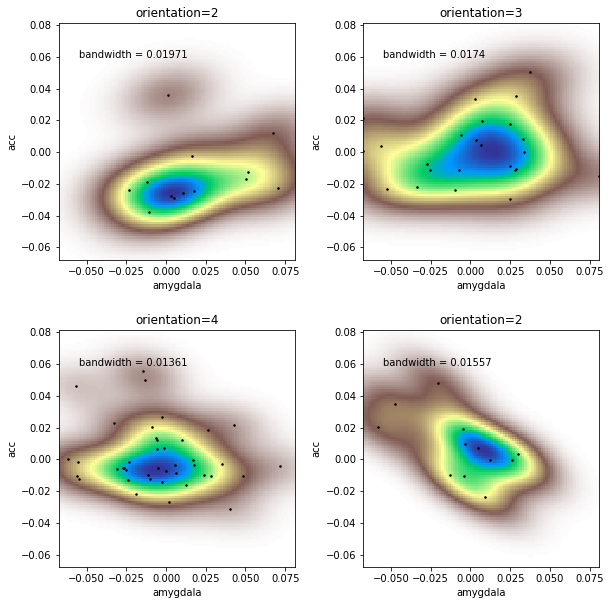

In [6]:
%matplotlib inline

# configure parameters
from scipy import stats
colors = plt.cm.terrain_r
xmin = ymin = data[['amygdala', 'acc']].values.min()
xmax = ymax = data[['amygdala', 'acc']].values.max()

#first kde
Ao2 = min(np.std(xo2), stats.iqr(xo2))
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions2 = np.vstack([X.ravel(), Y.ravel()])
values2 = np.vstack([xo2,yo2])
kernel2 = stats.gaussian_kde(values2)
Zo2 = np.reshape(kernel2(positions2).T, X.shape)

#second kde
Ao3 = min(np.std(xo3), stats.iqr(xo3))
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions3 = np.vstack([X.ravel(), Y.ravel()])
values3 = np.vstack([xo3,yo3])
kernel3 = stats.gaussian_kde(values3)
Zo3 = np.reshape(kernel3(positions3).T, X.shape)

#third kde
Ao4 = min(np.std(xo4), stats.iqr(xo4))
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions4 = np.vstack([X.ravel(), Y.ravel()])
values4 = np.vstack([xo4,yo4])
kernel4 = stats.gaussian_kde(values4)
Zo4 = np.reshape(kernel4(positions4).T, X.shape)

#fourth kde
Ao5 = min(np.std(xo5), stats.iqr(xo5))
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions5 = np.vstack([X.ravel(), Y.ravel()])
values5 = np.vstack([xo5,yo5])
kernel5 = stats.gaussian_kde(values5)
Zo5 = np.reshape(kernel5(positions5).T, X.shape)

#plotting gods
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.3)

#first plot
ax = fig.add_subplot(2,2,1)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_title('orientation=2')
ax.imshow(np.rot90(Zo2), cmap=colors, extent=[xmin, xmax, ymin, ymax])
ax.plot(xo2, yo2, 'k.', markersize=3)
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
h2 = kernel2.covariance_factor()*np.std((xo2,yo2))
ax.annotate('bandwidth = '+str(round(h2,5)),
            xy=(0, .8), xycoords='axes fraction',
            xytext=(20, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='top')

#second plot
ax = fig.add_subplot(2,2,2)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_title('orientation=3')
ax.imshow(np.rot90(Zo3), cmap=colors, extent=[xmin, xmax, ymin, ymax])
ax.plot(xo3, yo3, 'k.', markersize=3)
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
h3 = kernel3.covariance_factor()*np.std((xo3,yo3))
ax.annotate('bandwidth = '+str(round(h3,5)),
            xy=(0, .8), xycoords='axes fraction',
            xytext=(20, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='top')

#third plot
ax = fig.add_subplot(2,2,3)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_title('orientation=4')
ax.imshow(np.rot90(Zo4), cmap=colors, extent=[xmin, xmax, ymin, ymax])
ax.plot(xo4, yo4, 'k.', markersize=3)
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
h4 = kernel4.covariance_factor()*np.std((xo4,yo4))
ax.annotate('bandwidth = '+str(round(h4,5)),
            xy=(0, .8), xycoords='axes fraction',
            xytext=(20, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='top')

#fourth plot
ax = fig.add_subplot(2,2,4)
ax.set_xlabel('amygdala')
ax.set_ylabel('acc')
ax.set_title('orientation=2')
ax.imshow(np.rot90(Zo5), cmap=colors, extent=[xmin, xmax, ymin, ymax])
ax.plot(xo5, yo5, 'k.', markersize=3)
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
h5 = kernel5.covariance_factor()*np.std((xo5,yo5))
ax.annotate('bandwidth = '+str(round(h5,5)),
            xy=(0, .8), xycoords='axes fraction',
            xytext=(20, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='top')



<b>(c) *Plot the condition distribution of the volume of the amygdala as a function of political orientation: $p(amygdala|orientation=a)$,$a= 1,...,5$.  Do the same for the volume of the acc.  Plot $p(acc|orientation=a)$, $a= 1,...,5$. You may either use histogram or KDE to achieve the goal.*</b>

The plots are shown below:

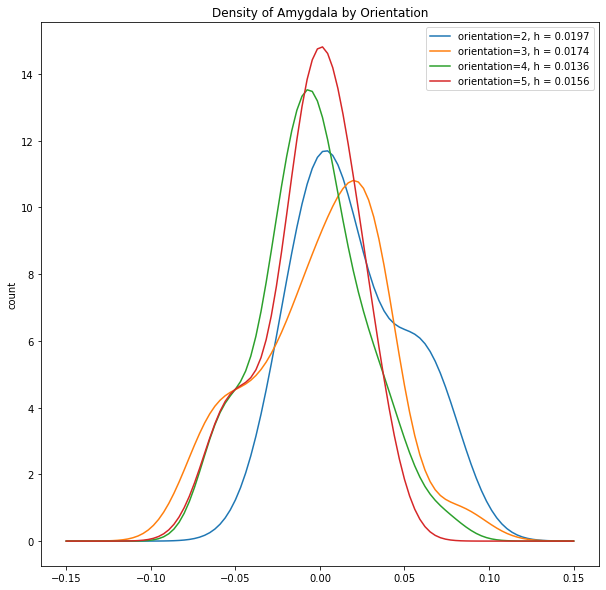

In [7]:
%matplotlib inline

cmin = -.15
cmax = .15
modelxo2 = KernelDensity(bandwidth=h2, kernel='gaussian')
modelxo2.fit(xo2.reshape(len(xo2),1))
xo2vals=np.mgrid[cmin:cmax:100j]
xo2vals=xo2vals.reshape((len(xo2vals),1))
xo2probs = modelxo2.score_samples(xo2vals)
xo2probs = np.exp(xo2probs)

modelxo3 = KernelDensity(bandwidth=h3, kernel='gaussian')
modelxo3.fit(xo3.reshape(len(xo3),1))
xo3vals=np.mgrid[cmin:cmax:100j]
xo3vals=xo3vals.reshape((len(xo3vals),1))
xo3probs = modelxo3.score_samples(xo3vals)
xo3probs = np.exp(xo3probs)

modelxo4 = KernelDensity(bandwidth=h4, kernel='gaussian')
modelxo4.fit(xo4.reshape(len(xo4),1))
xo4vals=np.mgrid[cmin:cmax:100j]
xo4vals=xo4vals.reshape((len(xo4vals),1))
xo4probs = modelxo4.score_samples(xo4vals)
xo4probs = np.exp(xo4probs)

modelxo5 = KernelDensity(bandwidth=h5, kernel='gaussian')
modelxo5.fit(xo5.reshape(len(xo5),1))
xo5vals=np.mgrid[cmin:cmax:100j]
xo5vals=xo5vals.reshape((len(xo5vals),1))
xo5probs = modelxo5.score_samples(xo5vals)
xo5probs = np.exp(xo5probs)

# plt.hist(xo2, bins =3)
plt.figure(figsize=(10,10))
plt.title('Density of Amygdala by Orientation')
plt.ylabel('count')
plt.plot(xo2vals, xo2probs)
plt.plot(xo3vals, xo3probs)
plt.plot(xo4vals, xo4probs)
plt.plot(xo5vals, xo5probs)
plt.legend(('orientation=2, h = '+str(round(h2,4)), 'orientation=3, h = '+str(round(h3,4)), 
            'orientation=4, h = '+str(round(h4,4)), 'orientation=5, h = '+str(round(h5,4))))

# plt.show()

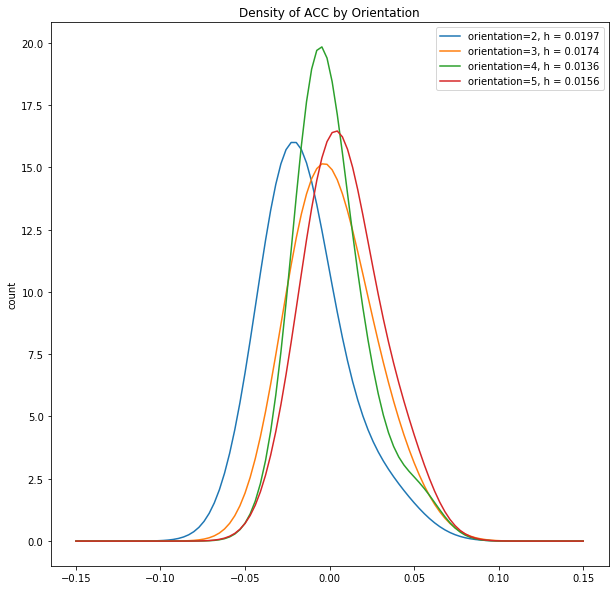

In [8]:
%matplotlib inline

cmin = -.15
cmax = .15
modelyo2 = KernelDensity(bandwidth=h2, kernel='gaussian')
modelyo2.fit(yo2.reshape(len(yo2),1))
yo2vals=np.mgrid[cmin:cmax:100j]
yo2vals=yo2vals.reshape((len(yo2vals),1))
yo2probs = modelyo2.score_samples(yo2vals)
yo2probs = np.exp(yo2probs)

modelyo3 = KernelDensity(bandwidth=h3, kernel='gaussian')
modelyo3.fit(yo3.reshape(len(yo3),1))
yo3vals=np.mgrid[cmin:cmax:100j]
yo3vals=yo3vals.reshape((len(yo3vals),1))
yo3probs = modelyo3.score_samples(yo3vals)
yo3probs = np.exp(yo3probs)

modelyo4 = KernelDensity(bandwidth=h4, kernel='gaussian')
modelyo4.fit(yo4.reshape(len(yo4),1))
yo4vals=np.mgrid[cmin:cmax:100j]
yo4vals=yo4vals.reshape((len(yo4vals),1))
yo4probs = modelyo4.score_samples(yo4vals)
yo4probs = np.exp(yo4probs)

modelyo5 = KernelDensity(bandwidth=h5, kernel='gaussian')
modelyo5.fit(yo5.reshape(len(yo5),1))
yo5vals=np.mgrid[cmin:cmax:100j]
yo5vals=yo5vals.reshape((len(yo5vals),1))
yo5probs = modelyo5.score_samples(yo5vals)
yo5probs = np.exp(yo5probs)

# plt.hist(yo2, bins =3)
plt.figure(figsize=(10,10))
plt.title('Density of ACC by Orientation')
plt.ylabel('count')
plt.plot(yo2vals, yo2probs)
plt.plot(yo3vals, yo3probs)
plt.plot(yo4vals, yo4probs)
plt.plot(yo5vals, yo5probs)
plt.legend(('orientation=2, h = '+str(round(h2,4)), 'orientation=3, h = '+str(round(h3,4)), 
            'orientation=4, h = '+str(round(h4,4)), 'orientation=5, h = '+str(round(h5,4))))

# plt.show()